In [1]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
audio = r"/Users/dippaul/Desktop/MUSIC_FEATURE_EXTRACTION/MUSIC_SAMPLES/true.mp3"
y,sr=librosa.load(audio)

In [6]:
print('Audio Sampling Rate: '+str(sr)+' samples/sec')
print('Total Samples: '+str(np.size(y)))
secs=np.size(y)/sr
print('Audio Length: '+str(secs)+' s')
IPython.display.Audio(audio)

Audio Sampling Rate: 22050 samples/sec
Total Samples: 3862425
Audio Length: 175.16666666666666 s


Text(0.5, 1.0, 'Harmonic + Percussive')

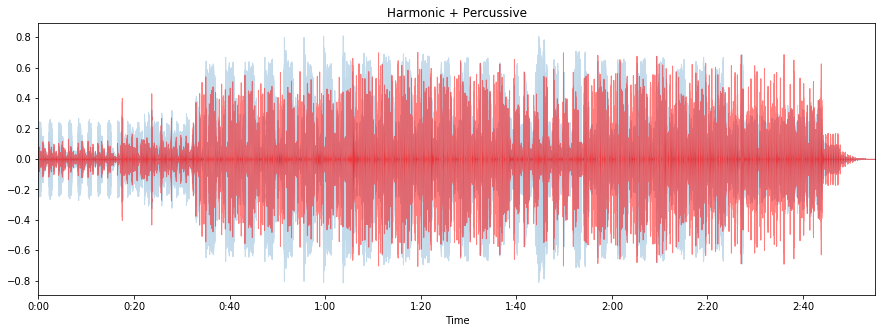

In [7]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

Detected Tempo: 117.45383522727273 beats/min


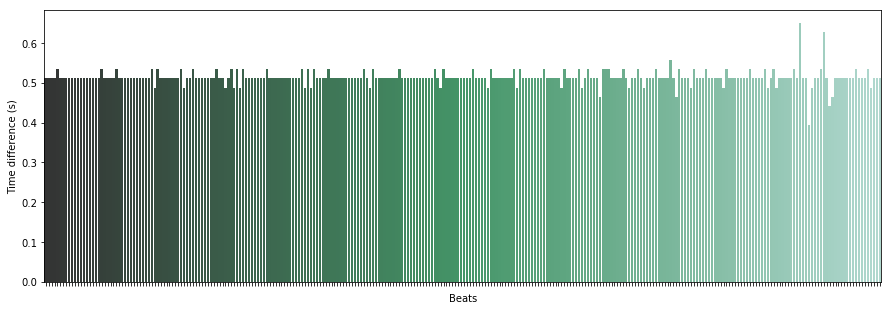

In [20]:
tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(beat_nums, beat_time_diff, palette="BuGn_d",ax=ax)
g=g.set(xticklabels=[])


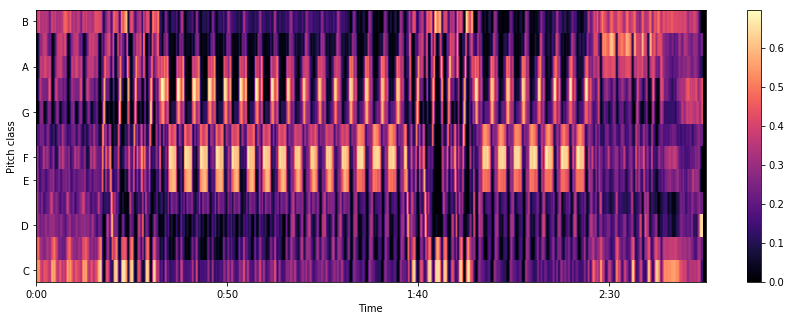

In [9]:
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()


Text(0.5, 1.0, 'MFCC')

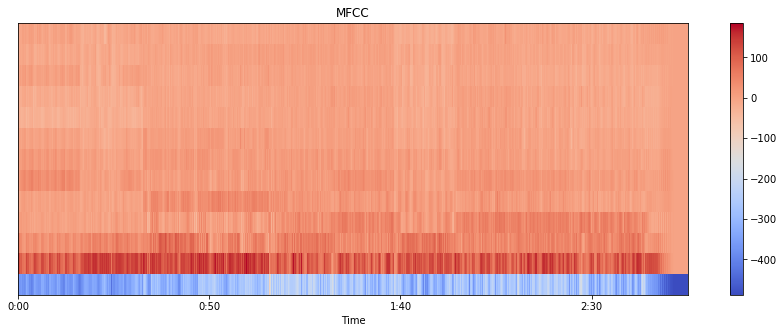

In [8]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

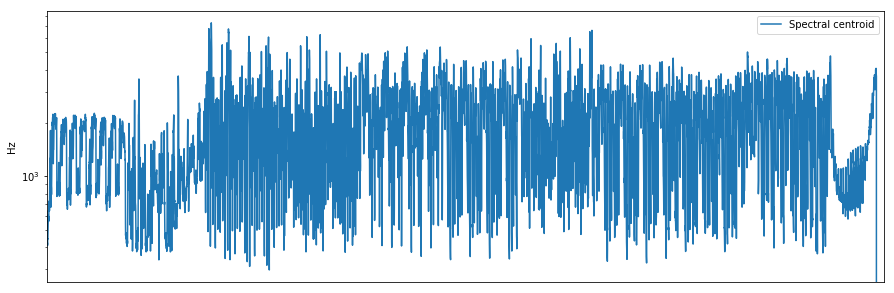

In [23]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

In [24]:
###MFCC
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)
print('MFCC Mean: '+str(mfccs_mean))
print('MFCC Standard Deviation: '+str(mfccs_std))

#Generate the chroma Dataframe
mfccs_df=pd.DataFrame()
for i in range(0,13):
    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
for i in range(0,13):
    mfccs_df['mfccs_std_'+str(i)]=mfccs_mean[i]
mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
mfccs_df


MFCC Mean: [-298.2503107   108.06587763   46.38084656   25.61006143   15.41065336
   16.91454594    9.13368886    1.78982716   -6.06515966   -5.00805422
   -4.6128377    -2.71773287   -4.48340532]
MFCC Standard Deviation: [62.57787403 35.01581646 22.709632   24.83451821 16.90192178 13.4842045
 10.60350667 10.1562365  11.842065   10.32244026  9.63533595  8.94335478
  9.26937257]


mfccs_mean_0  mfccs_mean_1  mfccs_mean_2  mfccs_mean_3  mfccs_mean_4  \
0   -298.250311    108.065878     46.380847     25.610061     15.410653   

   mfccs_mean_5  mfccs_mean_6  mfccs_mean_7  mfccs_mean_8  mfccs_mean_9  ...  \
0     16.914546      9.133689      1.789827      -6.06516     -5.008054  ...   

   mfccs_std_3  mfccs_std_4  mfccs_std_5  mfccs_std_6  mfccs_std_7  \
0    24.834518    16.901922    13.484204    10.603507    10.156237   

   mfccs_std_8  mfccs_std_9  mfccs_std_10  mfccs_std_11  mfccs_std_12  
0    11.842065     10.32244      9.635336      8.943355      9.269373  

[1 rows x 26 columns]

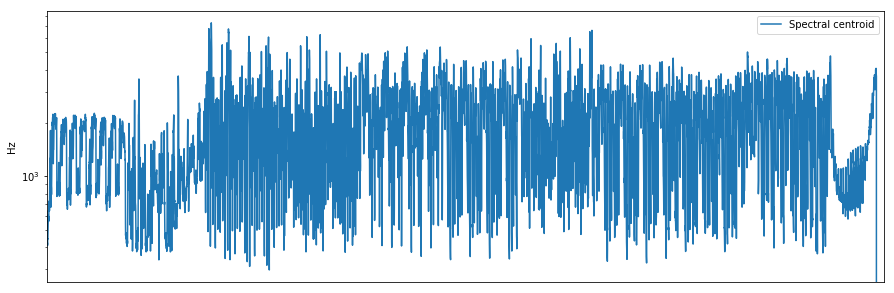

In [10]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

Text(0.5, 1.0, 'Spectral contrast')

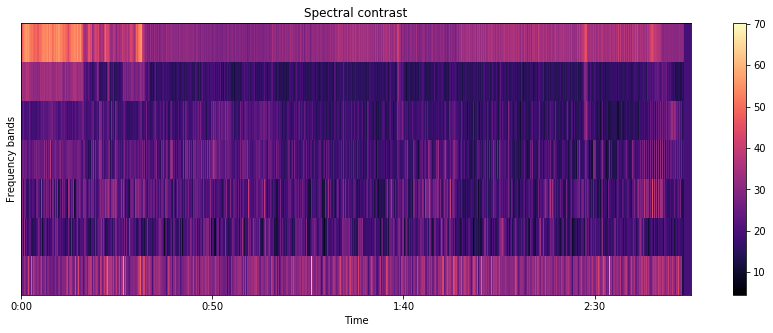

In [11]:
contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

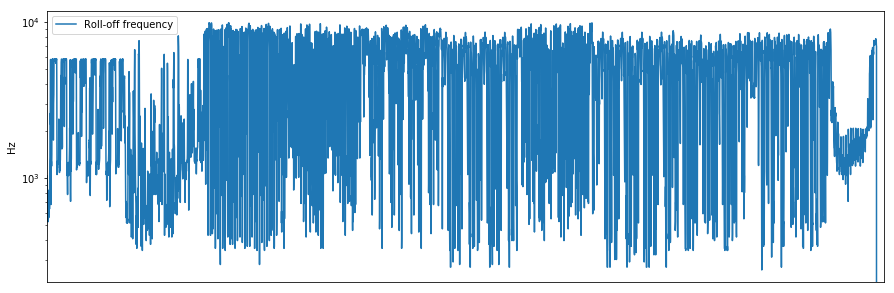

In [12]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()